In [1]:
%matplotlib inline

In [2]:
import csv
import os
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('max_columns', None)

In [3]:
# CONF = 'conf_bdlmapper_v1'
# CONF_SF = 'binning'
# CONF = 'conf_demapper_v2_{}'.format(CONF_SF)
CONF_SF = 'none'
CONF = 'conf_demapper_v3_{}'.format(CONF_SF)

In [4]:
import os
basedir = '/Users/dh/workspace/BDL/neurolens/experiments/cme_shine375/CME_mapper2d_data'

if os.path.isdir('/scratch'):
    basedir = '/scratch/groups/saggar/mapper/experiments/cme_shine375/CME_mapper2d_data'

files = []
for fname in os.listdir(basedir):
#     if fname.startswith('SBJ') and fname.endswith(CONF):
    if fname.startswith(CONF) and fname.endswith('.csv'):
        sbjid = fname.split('_')[2].replace('.csv', '')
        filepath = os.path.join(basedir, fname)
        if os.path.isfile(filepath):
            files.append((fname, filepath))
files = sorted(files)

In [5]:

# header = None
# with open(os.path.join(basedir, 'halfmapper_header.csv')) as f:
#     for row in csv.reader(f):
#         header = row

results = []
for fname, fpath in files: # Or only selected_files
    print(fname)
    with open(fpath) as f:
        for row in csv.DictReader(f):2
            results.append(R)
        


# outdir = os.path.join(basedir, 'hparams')
# os.makedirs(outdir, exist_ok=True)

# alpha_add = 1 if 'alpha' in header else 0
# HPARAMS = [h for h in ['R', 'K', 'G'] if h in header]
# HPARAMS_START = len(HPARAMS)
# HPARAMS_PLOTS = [4+alpha_add,6,5]

# assert len(header) == HPARAMS_START + sum(HPARAMS_PLOTS)

conf_demapper_v3_none_res_SBJ01.csv
conf_demapper_v3_none_res_SBJ02.csv
conf_demapper_v3_none_res_SBJ03.csv
conf_demapper_v3_none_res_SBJ04.csv
conf_demapper_v3_none_res_SBJ06.csv
conf_demapper_v3_none_res_SBJ07.csv
conf_demapper_v3_none_res_SBJ08.csv
conf_demapper_v3_none_res_SBJ09.csv
conf_demapper_v3_none_res_SBJ10.csv
conf_demapper_v3_none_res_SBJ12.csv
conf_demapper_v3_none_res_SBJ13.csv
conf_demapper_v3_none_res_SBJ14.csv
conf_demapper_v3_none_res_SBJ15.csv


In [6]:
import math

df = pd.DataFrame(results)

# df['k'] = df.apply(lambda row: math.ceil(row['ac_pick'] * row['knnparam_gain']), axis=1)
# df = df.drop_duplicates()
# df['hrf_comp'] = df.apply(lambda row: row['knnparam'] > 10, axis=1)
# df

df['knnparam'] = df.apply(lambda row: math.ceil(row['ac_pick'] * row['knnparam_gains']), axis=1)
df = df.drop_duplicates()

In [7]:
df_knnparam = df[['sbj', 'ac_pick']].drop_duplicates()
df_knnparam

,sbj,ac_pick
0,SBJ01,6.0
648,SBJ02,6.0
1296,SBJ03,6.0
1944,SBJ04,5.0
2592,SBJ06,6.0
3240,SBJ07,5.0
3888,SBJ08,6.0
4536,SBJ09,6.0
5184,SBJ10,6.0
5832,SBJ12,6.0


In [8]:
df

,sbj,idx,ac_pick,preprocess_types,dist_types,rknn_types,rknn_directed,knnparam_gains,embed_types,embed_dims,embed_perplexity,embed_kparam_gain,binning_types,binning_resolutions,binning_gains,binning_nsides,binning_k_gains,binning_dist_type,clustering_types,clustering_histo_bins,clustering_eps,clustering_minpts,finalgraph_types,preembed_mod_full,preembed_mod_wout_ac,embed_modd_bin,embed_modd_wout_ac,final_bins,final_mod_full,final_mod_max,alpha,max_coverage,partcoeff_avg,zscore_avg,yolks,yolks_pts,knnparam
0,SBJ01,9.0,6.0,none,correlation,wtd-pen,0.0,8.0,CMDS,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.180233,0.121103,0.142534,0.019084,837.0,0.445936,0.747751,0.039427,0.961768,0.195394,5.743448e-17,1.0,[0.0505050505050505 -0.393939393939394 NaN NaN],48
1,SBJ01,27.0,6.0,none,cityblock,wtd-pen,0.0,1.0,UMAP,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.587612,0.323607,152.0,0.397113,0.698583,0.572368,1.000000,0.277585,-1.168656e-17,2.0,[0.0505050505050505 -0.696969696969697 0.48484...,6
2,SBJ01,18.0,6.0,PCA99.99,correlation,wtd-pen,0.0,4.0,tSNE,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.281468,0.142792,0.740674,0.511747,180.0,0.430177,0.734123,0.600000,0.950000,0.249954,0.000000e+00,2.0,[0.0101010101010101 -0.696969696969697 0.49494...,24
3,SBJ01,36.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,8.0,UMAP,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.237443,0.063125,0.295485,0.136994,882.0,0.746208,0.748280,0.060091,0.052154,0.022971,3.021015e-17,0.0,[NaN NaN NaN NaN],48
4,SBJ01,8.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,4.0,CMDS,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.414471,0.109768,0.238165,0.121200,302.0,0.179520,0.301746,0.099338,1.000000,0.255844,7.646569e-17,2.0,[0.0101010101010101 -0.393939393939394 0.47474...,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,SBJ14,631.0,6.0,none,cityblock,wtd-pen,0.0,4.0,none,2.0,20.0,4.0,cball,150.0,50.0,4.0,4.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.281716,0.065778,0.528147,0.124742,333.0,0.106846,0.744753,0.465465,1.000000,0.635771,4.467564e-17,3.0,[NaN NaN NaN NaN],24
7772,SBJ14,643.0,6.0,none,cityblock,wtd-pen,0.0,4.0,none,2.0,20.0,4.0,cball,200.0,50.0,4.0,4.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.281716,0.065778,0.528147,0.124742,473.0,0.115734,0.741479,0.437632,1.000000,0.640721,3.379960e-17,4.0,[NaN NaN NaN NaN],24
7773,SBJ14,642.0,6.0,PCA99.99,correlation,wtd-pen,0.0,4.0,none,2.0,20.0,4.0,cball,200.0,50.0,4.0,4.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.220008,0.063773,0.734575,0.166828,339.0,0.140033,0.611967,0.634218,1.000000,0.534043,7.859986e-17,2.0,[0.373737373737374 -0.878787878787879 0.666666...,24
7774,SBJ14,641.0,6.0,none,correlation,wtd-pen,0.0,4.0,none,2.0,20.0,4.0,cball,200.0,50.0,4.0,4.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.238507,0.089300,0.736333,0.191654,418.0,0.196760,0.675491,0.569378,1.000000,0.485332,6.374486e-17,1.0,[0.646464646464647 -0.757575757575758 NaN NaN],24


## Combine the plots generated by matlab into one

In [9]:
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

sns.set(style = "whitegrid")

def create_axis(df, axis_hps, idx=0):
    if idx == len(axis_hps):
        return [{}]
    hp_name = axis_hps[idx]
    hp_vals = df[hp_name].drop_duplicates().to_numpy()
    vals = []
    hp_vals = sorted(sorted(hp_vals), key=lambda x: x != 'none')
    for hpv in hp_vals:
        df_hp = df[df[hp_name] == hpv]
        val = create_axis(df_hp, axis_hps, idx+1)
        if len(hp_vals) > 1:
            for v in val:
                v[hp_name] = hpv
        vals.extend(val)
    return vals        

def sdir(sbj):
    return os.path.join(
        basedir,
        '_'.join([sbj, CONF.replace('_'+CONF_SF, ''), 'before', CONF_SF]))

def pdir():
    dir_path = os.path.join(
        basedir,
        '_'.join(['processed', CONF.replace('_'+CONF_SF, ''), 'before', CONF_SF]))
    os.makedirs(dir_path, exist_ok=True)
    return dir_path

def ax_key_toks(ax_x):
    return sorted(list(set([k for x in ax_x for k,v in x.items()])))

def plot_image(img_path, ax):
    im = Image.open(img_path)
    img = np.array(im)
    ax.imshow(img)
    del img
    del im
    return ax

# create_axis(df, hps_y)

In [10]:


def plot_grid(df, sbj, hps_x, hps_y, hps_fixed_vals, plottype='embed', regen=False, text_f=None):
    ax_x = create_axis(df, hps_x)
    ax_y = create_axis(df, hps_y)
    
    
    x_keys = sorted(list(set([k for x in ax_x for k,v in x.items()])))
    y_keys = sorted(list(set([k for y in ax_y for k,v in y.items()])))
    fixed_toks = sorted(['{}_{}'.format(k,v) for k,v in hps_fixed_vals.items()])
    savefig_path = os.path.join(
        sdir(sbj),
        'comb{}_{}_{}.png'.format(
            '_' + plottype if plottype != 'embed' else '',
            sbj,
            '_'.join(['x'] + x_keys + ['y'] + y_keys + fixed_toks)))
    
    if os.path.isfile(savefig_path) and not regen:
        return

    ncols = len(ax_x)
    nrows = len(ax_y)
    fsize = 20
    fig, axr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fsize * (ncols/nrows)*1.1,fsize))

    for r,(y,axc) in enumerate(zip(ax_y,axr)):
        for c,(x,ax) in enumerate(zip(ax_x,axc)):
            K = {'sbj':sbj, **x, **y, **hps_fixed_vals}
            df_filtered = df
            for k,v in K.items():
                df_filtered = df_filtered[df_filtered[k] == v]
            if len(df_filtered) == 0:
                ax.axis('off')
                continue
            assert len(df_filtered) == 1, 'Too many ({}) items found for {}, {}, {}'.format(
                len(df_filtered), x, y, hps_fixed_vals)
            item = df_filtered
            sbj = item['sbj'].to_numpy()[0]
            idx = int(item['idx'].to_numpy()[0])


            ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.grid(False)
            if r == len(ax_y)-1:
                ax.set_xlabel(' '.join([str(x[k]) for k in hps_x if k in x]))
                ax.xaxis.set_label_position("bottom")
            if c == 0:
                ax.set_ylabel(' '.join([str(y[k]) for k in hps_y if k in y]))

            img_path = os.path.join(
                sdir(sbj),
                '_'.join(['res', sbj, str(idx), plottype]) + '.png')
            if not os.path.isfile(img_path):
    #             ax.axis('off')
                continue
        
            modd = df_filtered[['preembed_mod_full', 'preembed_mod_wout_ac', 'embed_modd_bin', 'embed_modd_wout_ac']].to_numpy()[0]
            modd = [str(round(m,3)) for m in modd]
#             title = ' -> '.join([', '.join(modd[0:2]), ', '.join(modd[2:4])])
#             ax.set_title(title)
            if text_f:
                ax = text_f(ax, item)
            ax = plot_image(img_path, ax)
    plt.tight_layout()
    
    plt.savefig(savefig_path, dpi=150)
    plt.show()
    plt.close()
    
# plot_grid(df, 'SBJ01', hps_x, hps_y, {'knnparam_gains': 1.0})


In [ ]:

def plot_before_binning():
#     hps_x = ['preprocess_types', 'dist_types', 'rknn_types']
    hps_x = ['preprocess_types', 'rknn_types', 'dist_types']
    hps_y = df.columns[8:12]
    sbjs = df['sbj'].drop_duplicates().to_numpy()
    for sbj in tqdm(sbjs):
        for knnparam in [1.0, 2.0, 4.0, 8.0, 12.0]:
            hps_fixed_vals = {'knnparam_gains': knnparam}
            df_filtered = df
            for k,v in hps_fixed_vals.items():
                df_filtered = df_filtered[df_filtered[k] == v]
            plot_grid(df_filtered, sbj, hps_x, hps_y, hps_fixed_vals)

plot_before_binning()

In [ ]:

def plot_before_binning_yolks():
#     hps_x = ['preprocess_types', 'dist_types', 'rknn_types']
    hps_x = ['preprocess_types', 'rknn_types', 'dist_types']
    hps_y = df.columns[8:12]
    sbjs = df['sbj'].drop_duplicates().to_numpy()
    for sbj in tqdm(sbjs):
        if not sbj == 'SBJ07' and not sbj == 'SBJ14':
            continue
        for knnparam in [1.0, 2.0, 4.0, 8.0, 12.0]:
            hps_fixed_vals = {'knnparam_gains': knnparam}
            df_filtered = df
            for k,v in hps_fixed_vals.items():
                df_filtered = df_filtered[df_filtered[k] == v]
            plot_grid(df_filtered, sbj, hps_x, hps_y, hps_fixed_vals, 'yolk')

plot_before_binning_yolks()

In [89]:
df

,sbj,idx,ac_pick,preprocess_types,dist_types,rknn_types,rknn_directed,knnparam_gains,embed_types,embed_dims,embed_perplexity,embed_kparam_gain,binning_types,binning_resolutions,binning_gains,binning_nsides,binning_k_gains,binning_dist_type,clustering_types,clustering_histo_bins,clustering_eps,clustering_minpts,finalgraph_types,preembed_mod_full,preembed_mod_wout_ac,embed_modd_bin,embed_modd_wout_ac,final_bins,final_mod_full,final_mod_max,alpha,max_coverage,partcoeff_avg,zscore_avg,yolks,yolks_pts,knnparam
0,SBJ01,9.0,6.0,none,correlation,wtd-pen,0.0,8.0,CMDS,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.180233,0.121103,0.142534,0.019084,837.0,0.445936,0.747751,0.039427,0.961768,0.195394,5.743448e-17,1.0,[0.0505050505050505 -0.393939393939394 NaN NaN],48
1,SBJ01,27.0,6.0,none,cityblock,wtd-pen,0.0,1.0,UMAP,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.587612,0.323607,152.0,0.397113,0.698583,0.572368,1.000000,0.277585,-1.168656e-17,2.0,[0.0505050505050505 -0.696969696969697 0.48484...,6
2,SBJ01,18.0,6.0,PCA99.99,correlation,wtd-pen,0.0,4.0,tSNE,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.281468,0.142792,0.740674,0.511747,180.0,0.430177,0.734123,0.600000,0.950000,0.249954,0.000000e+00,2.0,[0.0101010101010101 -0.696969696969697 0.49494...,24
3,SBJ01,36.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,8.0,UMAP,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.237443,0.063125,0.295485,0.136994,882.0,0.746208,0.748280,0.060091,0.052154,0.022971,3.021015e-17,0.0,[NaN NaN NaN NaN],48
4,SBJ01,8.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,4.0,CMDS,2.0,20.0,4.0,Nd,10.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.414471,0.109768,0.238165,0.121200,302.0,0.179520,0.301746,0.099338,1.000000,0.255844,7.646569e-17,2.0,[0.0101010101010101 -0.393939393939394 0.47474...,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,SBJ04,358.0,5.0,PCA99.99,correlation,wtd-pen,0.0,8.0,tSNE,2.0,20.0,4.0,Nd,15.0,80.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.189172,0.117686,0.706171,0.103810,245.0,0.201832,0.706658,0.857143,1.000000,0.569118,5.845664e-17,2.0,[0.0404040404040404 0.515151515151515 0.656565...,40
2358,SBJ04,484.0,5.0,PCA99.99,cityblock,wtd-pen,0.0,1.0,none,2.0,20.0,4.0,cball,150.0,45.0,4.0,2.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.747281,0.169047,0.744231,0.460192,221.0,0.659169,0.651559,0.778281,1.000000,0.070686,7.434978e-17,1.0,[0.0303030303030303 0.696969696969697 NaN NaN],5
2359,SBJ04,401.0,5.0,none,correlation,wtd-pen,0.0,4.0,tSNE,2.0,20.0,4.0,Nd,20.0,80.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.345729,0.214634,0.746223,0.623457,490.0,0.483360,0.711623,0.810204,1.000000,0.282780,7.250436e-18,2.0,[0.0707070707070707 0.515151515151515 0.444444...,20
2360,SBJ04,444.0,5.0,PCA99.99,cityblock,wtd-pen,0.0,8.0,none,2.0,20.0,4.0,cball,100.0,40.0,4.0,2.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.318637,0.094467,0.691934,0.235906,1081.0,0.432982,0.746376,0.259019,1.000000,0.314060,-5.422736e-17,3.0,[NaN NaN NaN NaN],40


  0%|                                                                                                    | 0/18 [00:00<?, ?it/s]

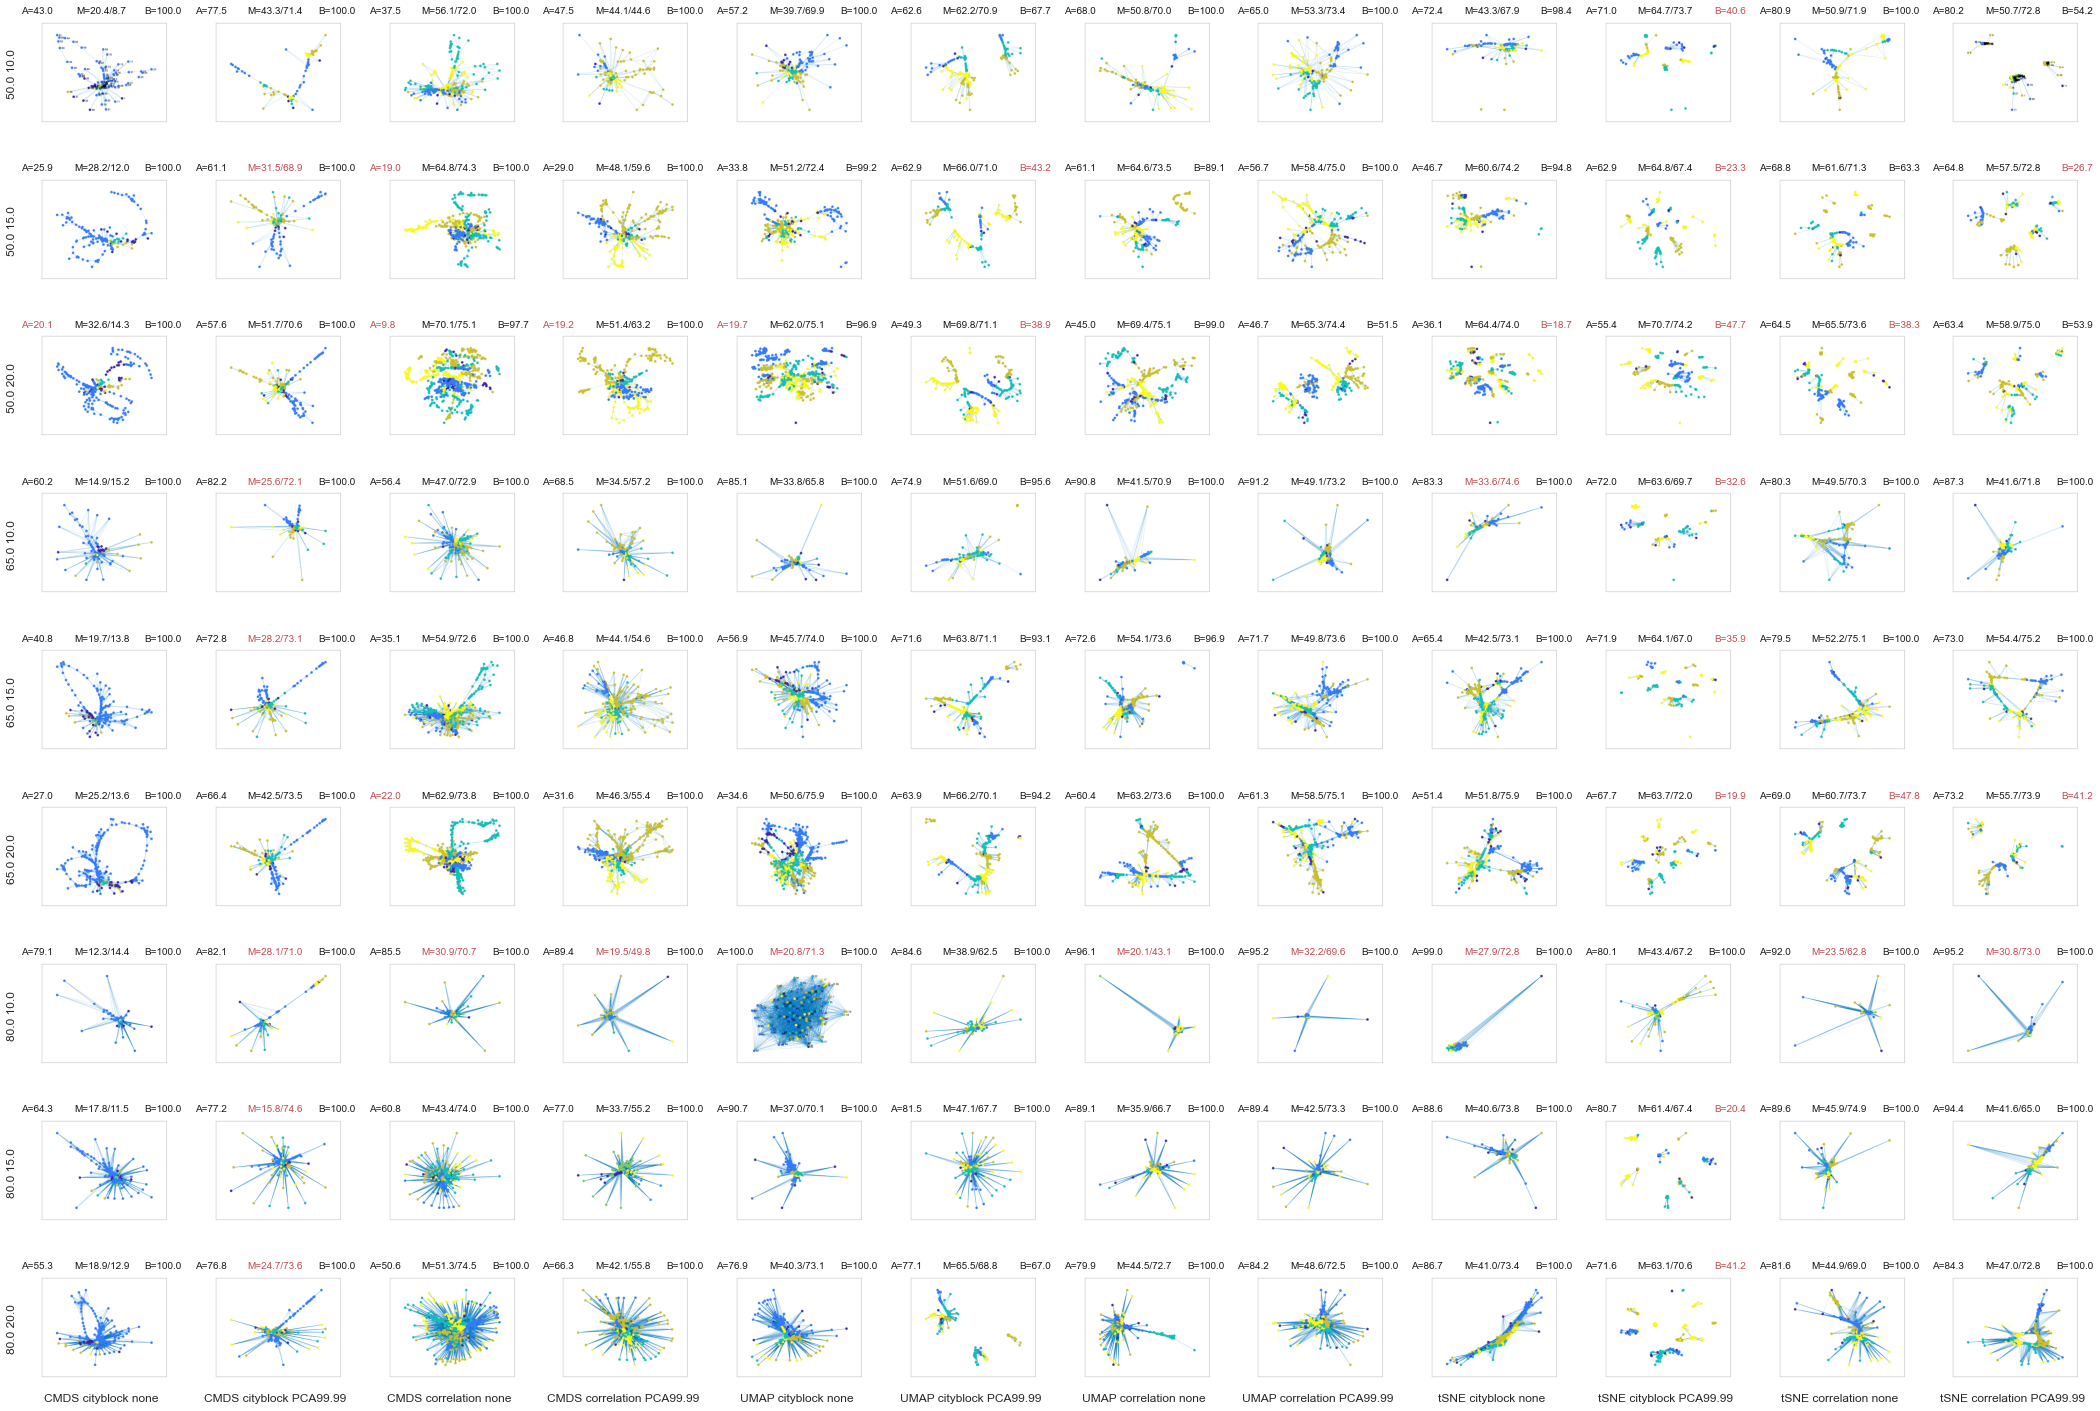

  6%|█████                                                                                       | 1/18 [00:15<04:20, 15.32s/it]


In [12]:
def display_text(ax, item):
    A = item['alpha'].to_numpy()[0] * 100
    B = item['max_coverage'].to_numpy()[0] * 100
    M = item['final_mod_full'].to_numpy()[0] * 100
    M_total = item['final_mod_max'].to_numpy()[0] * 100
    M_perc = M / M_total
    opts = {'fontsize': 'small', 'pad': 0}
    ax.set_title('A=' + str(round(A,1)), c='r'if A < 25.0 else 'k', loc='left', **opts)
    ax.set_title('B=' + str(round(B,1)), c='r'if B < 50.0 else 'k', loc='right', **opts)
    ax.set_title('M=' + str(round(M,1)) + '/' + str(round(M_total,1)), c='r'if M_perc < 0.5 else 'k', loc='center', **opts)
    return ax


def plot_binning(regen=False):
#     hps_x = ['preprocess_types', 'dist_types', 'rknn_types']
#     hps_x = ['binning_k_gains'] + list(df.columns[3:12])
#     hps_y = list(df.columns[12:16]) + [df.columns[17]]
    
    hps_x = ['embed_types', 'dist_types', 'preprocess_types', 'binning_k_gains',
             'rknn_types', 'rknn_directed', 'knnparam_gains',
             'embed_dims', 'embed_perplexity', 'embed_kparam_gain']
    hps_y = ['binning_types', 'binning_gains', 'binning_resolutions', 'binning_nsides', 'binning_dist_type']
    
    sbjs = df['sbj'].drop_duplicates().to_numpy()
    
    iter_sbjs = sbjs[:1]
    bintypes = df['binning_types'].drop_duplicates().to_numpy()
    knnparams = [1.0, 4.0, 8.0] # df['knnparam_gains'].drop_duplicates().to_numpy()
    plottypes = ['embedinv', 'yolk', 'embed']
    all_lens = [len(iter_sbjs), len(bintypes), len(knnparams), len(plottypes)]
    
    bar = tqdm(total=np.prod(all_lens))
    for sbj in iter_sbjs:
        for bintype in bintypes:
            for knnparam in knnparams:
                for plottype in plottypes:
                    hps_fixed_vals = {'knnparam_gains': knnparam, 'binning_types': bintype}
                    df_filtered = df
                    for k,v in hps_fixed_vals.items():
                        df_filtered = df_filtered[df_filtered[k] == v]
                    plot_grid(df_filtered, sbj, hps_x, hps_y, hps_fixed_vals, plottype,
                              regen=regen, text_f=display_text)
                    bar.update()
                    return

plot_binning(True)

In [52]:
items = df.iloc[[10, 11]]

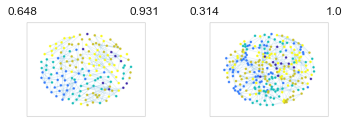

In [83]:
def display_text(ax, item):
    A = item['alpha'].to_numpy()[0]
    B = item['max_coverage'].to_numpy()[0]
    ax.set_title(round(A,3), c='r'if A < 0.25 else 'k', loc='left', pad=0)
    ax.set_title(round(B,3), c='r'if A < 0.25 else 'k', loc='right', pad=0)
    return ax


fig, axs = plt.subplots(nrows=1, ncols=2)

for i,ax in enumerate(axs):
    item = items.iloc[[i]]
    sbj = item['sbj'].to_numpy()[0]
    idx = int(item['idx'].to_numpy()[0])
    
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
#     if r == len(ax_y)-1:
#         ax.set_xlabel(' '.join([str(x[k]) for k in hps_x if k in x]))
#         ax.xaxis.set_label_position("bottom")
#     if c == 0:
#         ax.set_ylabel(' '.join([str(y[k]) for k in hps_y if k in y]))

    img_path = os.path.join(
        sdir(sbj),
        '_'.join(['res', sbj, str(idx), 'embed']) + '.png')
    if not os.path.isfile(img_path):
    #             ax.axis('off')
        continue

    ax = plot_image(img_path, ax)
    ax = display_text(ax, item)

## Boxplots

In [ ]:
import math

def plot_boxplot(df, hps_x, hps_y, boxplot_hps_x, hps_fixed_vals, target_metric, show_plot=False):
    ax_x = create_axis(df, hps_x)
    ax_y = create_axis(df, hps_y)
    ax_bx_x = create_axis(df, boxplot_hps_x)

    ncols = len(ax_x)
    nrows = len(ax_y)
    fsize = 20
    fig, axr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fsize * (ncols/nrows)*1.1,fsize))

    df_filtered = df
    for k,v in hps_fixed_vals.items():
        df_filtered = df_filtered[df_filtered[k] == v]
    arr = df_filtered[target_metric].to_numpy()
    vmin, vmax = np.amin(arr), np.amax(arr)


    for r,(y,axc) in enumerate(zip(ax_y,axr)):
        for c,(x,ax) in enumerate(zip(ax_x,axc)):
            K = {**x, **y, **hps_fixed_vals}
            df_filtered = df
            for k,v in K.items():
                df_filtered = df_filtered[df_filtered[k] == v]

            df_filtered = df_filtered[boxplot_hps_x + [target_metric]]


            # assemble the label -> value for boxplot
            labels = []
            values = []
            for bx_x in ax_bx_x:
                df_items = df_filtered
                for k,v in bx_x.items():
                    df_items = df_items[df_items[k] == v]
                arr = df_items[target_metric].to_numpy()
                values.append(arr)
                label = ' '.join([str(bx_x[k]) for k in boxplot_hps_x if k in bx_x])
                labels.append(label)

            sns.boxplot(data=values, ax=ax)
            ax.set_ylim(vmin, vmax)
            
            if r == len(ax_y)-1:
                ax.set_xticklabels(labels, rotation=80)
            else:
                ax.set(xticklabels=[])
#                 ax.set_tick_params(bottom=False)
            if r == 0:
                ax.set_xlabel(' '.join([str(x[k]) for k in hps_x if k in x]))
                ax.xaxis.set_label_position("top")
            if c == 0:
                ax.set_ylabel(' '.join([str(y[k]) for k in hps_y if k in y]))


    plt.suptitle(target_metric)
    # plt.tight_layout()
    plt.tight_layout(rect=[0, 0., 1, 0.98])

    fixed_toks = sorted(['{}_{}'.format(k,v) for k,v in hps_fixed_vals.items()])
    savefig_path = os.path.join(
        pdir(),
        'boxplot_{}.png'.format(
            '_'.join([target_metric] + ['x'] + ax_key_toks(ax_x) + ['y'] + ax_key_toks(ax_y) + \
                     ['boxx'] + ax_key_toks(ax_bx_x) + fixed_toks)))
    if show_plot:
        plt.show()
    else:
        plt.savefig(savefig_path, dpi=150)
    plt.close()



In [ ]:
hps_x = ['preprocess_types']
hps_y = ['rknn_types', 'dist_types']
boxplot_hps_x = ['embed_types', 'embed_dims', 'embed_perplexity', 'embed_kparam_gain']
target_metric = 'embed_modd_bin'
hps_fixed_vals = {'knnparam_gains': 1.0}

# plot_boxplot(df, hps_x, hps_y, boxplot_hps_x, hps_fixed_vals, target_metric, show_plot=True)

In [ ]:
def plot_boxplot_skip_from_binning():
    hps_x = ['preprocess_types']
    hps_y = ['rknn_types', 'dist_types']
    boxplot_hps_x = ['embed_types', 'embed_dims', 'embed_perplexity', 'embed_kparam_gain']
    target_metrics = ['preembed_mod_full', 'preembed_mod_wout_ac', 'embed_modd_bin', 'embed_modd_wout_ac',
                      'delta_modd_bin', 'delta_modd_wout_ac']
    
    df['delta_modd_bin'] = df.apply(lambda x: x['embed_modd_bin'] - x['preembed_mod_full'], axis=1)
    df['delta_modd_wout_ac'] = df.apply(lambda x: x['embed_modd_wout_ac'] - x['preembed_mod_wout_ac'], axis=1)
    
    for target_metric in tqdm(target_metrics):
        for kparam in [1.0, 2.0, 4.0, 8.0, 12.0]:
            hps_fixed_vals = {'knnparam_gains': kparam}
            plot_boxplot(df, hps_x, hps_y, boxplot_hps_x, hps_fixed_vals, target_metric)
            
plot_boxplot_skip_from_binning()

## Average over different columns

In [ ]:
def create_table(df, cols, target_metrics):
    new_table = []

    for col_vals in create_axis(df, cols):
        df_filtered = df
        for k,v in col_vals.items():
            df_filtered = df_filtered[df_filtered[k] == v]
    #     item = {k:df_filtered[k].to_numpy()[0] for k in cols}
        item = {k:v for k,v in col_vals.items()}
        for metric in target_metrics:
            item['avg_' + metric] = np.mean(df_filtered[metric])
        new_table.append(item)
    print('Found ', len(new_table))
    return new_table

In [ ]:
cols = ["preprocess_types", "dist_types", "rknn_types",
        "knnparam_gains", "embed_types", "embed_perplexity", "embed_kparam_gain"]

target_metrics = ["preembed_mod_full", "preembed_mod_wout_ac", "embed_modd_bin", "embed_modd_wout_ac"]

dfavg = pd.DataFrame(
    data=create_table(df, cols, target_metrics),
    columns=['avg_'+m for m in target_metrics] + cols)

dfavg = dfavg.replace(np.nan, '').sort_values(by='avg_embed_modd_wout_ac', ascending=False)
dfavg.head(30)

In [ ]:
cols = ["preprocess_types", "dist_types", "rknn_types", "knnparam_gains"]

target_metrics = ["preembed_mod_full", "preembed_mod_wout_ac", "embed_modd_bin", "embed_modd_wout_ac"]

dfavg = pd.DataFrame(
    data=create_table(df, cols, target_metrics),
    columns=['avg_'+m for m in target_metrics] + cols)

dfavg = dfavg.replace(np.nan, '').sort_values(by='avg_embed_modd_wout_ac', ascending=False)
dfavg

In [ ]:
cols = ["embed_types", "embed_perplexity", "embed_kparam_gain"]


target_metrics = ["preembed_mod_full", "preembed_mod_wout_ac", "embed_modd_bin", "embed_modd_wout_ac"]

dfavg = pd.DataFrame(
    data=create_table(df, cols, target_metrics),
    columns=['avg_'+m for m in target_metrics] + cols)

dfavg = dfavg.replace(np.nan, '').sort_values(by='avg_embed_modd_wout_ac', ascending=False)
dfavg

In [ ]:
# cols = ["embed_types", "embed_perplexity", "embed_kparam_gain"]
cols = ["rknn_types", "knnparam_gains"]

target_metrics = ["preembed_mod_full", "preembed_mod_wout_ac", "embed_modd_bin", "embed_modd_wout_ac"]

dfavg = pd.DataFrame(
    data=create_table(df, cols, target_metrics),
    columns=['avg_'+m for m in target_metrics] + cols)

dfavg = dfavg.replace(np.nan, '').sort_values(by='avg_embed_modd_wout_ac', ascending=False)
dfavg

In [30]:
df[(df['sbj'] == 'SBJ01') & (df['alpha'] < 0.25)  & (df['knnparam_gains'] == 1.0)]

,sbj,idx,ac_pick,preprocess_types,dist_types,rknn_types,rknn_directed,knnparam_gains,embed_types,embed_dims,embed_perplexity,embed_kparam_gain,binning_types,binning_resolutions,binning_gains,binning_nsides,binning_k_gains,binning_dist_type,clustering_types,clustering_histo_bins,clustering_eps,clustering_minpts,finalgraph_types,preembed_mod_full,preembed_mod_wout_ac,embed_modd_bin,embed_modd_wout_ac,final_bins,final_mod_full,final_mod_max,alpha,max_coverage,partcoeff_avg,zscore_avg,yolks,yolks_pts,knnparam
78,SBJ01,99.0,6.0,none,cityblock,wtd-pen,0.0,1.0,CMDS,2.0,20.0,4.0,Nd,20.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.333285,0.090074,239.0,0.325809,0.143015,0.200837,1.000000,0.107187,-9.755098e-18,1.0,[0.0303030303030303 -0.515151515151515 NaN NaN],6
80,SBJ01,98.0,6.0,PCA99.99,correlation,wtd-pen,0.0,1.0,CMDS,2.0,20.0,4.0,Nd,20.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.692437,0.347797,0.494662,0.210386,438.0,0.513906,0.632305,0.191781,1.000000,0.126559,2.940317e-17,1.0,[0.0404040404040404 -0.454545454545455 NaN NaN],6
83,SBJ01,97.0,6.0,none,correlation,wtd-pen,0.0,1.0,CMDS,2.0,20.0,4.0,Nd,20.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.695215,0.374740,0.529932,0.277247,794.0,0.700838,0.750987,0.098237,0.977330,0.053779,-4.474450e-18,1.0,[0.0101010101010101 -0.636363636363636 NaN NaN],6
167,SBJ01,241.0,6.0,none,correlation,wtd-pen,0.0,1.0,CMDS,2.0,20.0,4.0,Nd,20.0,65.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.695215,0.374740,0.529932,0.277247,920.0,0.629419,0.738354,0.219565,1.000000,0.109229,2.751422e-17,1.0,[0.0303030303030303 -0.454545454545455 NaN NaN],6
278,SBJ01,49.0,6.0,none,correlation,wtd-pen,0.0,1.0,CMDS,2.0,20.0,4.0,Nd,15.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.695215,0.374740,0.529932,0.277247,567.0,0.647802,0.742903,0.190476,1.000000,0.098200,-7.832261e-18,1.0,[0.0202020202020202 -0.393939393939394 NaN NaN],6
307,SBJ01,123.0,6.0,none,cityblock,wtd-pen,0.0,1.0,UMAP,2.0,20.0,4.0,Nd,20.0,50.0,4.0,1.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.581005,0.408163,604.0,0.620301,0.750570,0.197020,0.968543,0.114408,-5.183492e-17,1.0,[0.0303030303030303 -0.636363636363636 NaN NaN],6
374,SBJ01,495.0,6.0,none,cityblock,wtd-pen,0.0,1.0,none,2.0,20.0,4.0,cball,200.0,45.0,4.0,2.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.701830,0.390430,361.0,0.493696,0.732217,0.141274,0.332410,0.042372,-1.230164e-18,1.0,[0.0101010101010101 -0.696969696969697 NaN NaN],6
513,SBJ01,459.0,6.0,none,cityblock,wtd-pen,0.0,1.0,none,2.0,20.0,4.0,cball,200.0,40.0,4.0,2.0,euclidean,sl_histo,10.0,0.0,2.0,full,0.697534,0.240313,0.701830,0.390430,361.0,0.493696,0.732217,0.141274,0.332410,0.042372,-1.230164e-18,1.0,[0.0101010101010101 -0.696969696969697 NaN NaN],6
